# Python Tutorial 2 for Data Science
## Introduction to Machine Learning: Classification with k-Nearest Neighbors 
#### (Adapted from Data 8 Fall 2017 Project 3)
#### Patrick Chao 1/21/18

# Introduction
The purpose of this notebook is to serve as an elementary python tutorial introducing fundamental data science concepts including data exploration, classification, hyper-parameter tuning, plotting, and loss functions.

The tutorial is centered around the third project from Data 8 Fall 2017. This project involves classifying a movie's genre as either action or romance. In this notebook, we will explore how to process and understand the data, create a model, tune, and test.

## How to avoid Overfitting: Train/Validation/Test

A huge part of machine learning of ensuring that our model performs well. With current technology, we have access to massive datasets and information, but the difficulty is parsing through all the numbers to understand something. Models can require huge amounts of data and can take hours or days to train on the data to perform well. 

The first phase of training a model is, well, *training*.

### Training
In this part, the model continually learns on the data and improves. We use a subset of the data known as the **training set**. Given some model $f$, assume we have input $\vec{x}$ and a true label/output $\vec y$. We would like $f(\vec x)\approx \vec y$, or alternatively we would like to minimize $\|f(\vec x)-\vec y\|$. This value $\|f(\vec x)-\vec y\|$ is known as the **error**, how close our model is to the correct value. When training on the training set, the error is more specifically known as the **training error**.

Our model look through each training data instance and will have some prediction $f(\vec x)$. Based on the value of $\|f(\vec x)-\vec y\|$, the model will change slightly and improve. The more incorrect the prediction was, the more it will change. One method of optimizing our model $f$ is **gradient descent**. 

When training, the error follows this form of a curve.

<img src='train.png' width="400" height="400">

You may consider model order as the "complexity" of the model. This may be more parameters, higher dimensionality, or more training. As your model trains, the training error will continually decrease. An analogy would be predicting a line using a $10$ degree polynomial. Since any $10$ degree polynomial has linear degree terms, a $10$ degree polynomial should be at least as good as an linear model for the training data. However, we shall see that this may not always be the case for all data.

### Validation
One trap that models may run into is **overfitting**. This is where the model over-trained on the data and does not extrapolate to other real world examples. The model becomes overly complex and attempts to fit every nuance of the data, and fails to generalize. An analogy would be using a $10$ degree polynomial to fit a line. It may be able to fit the training data extremely well, better than a line would, but it may fail for other points.

The best way to understand this is an example.

Consider the line $y=2x+1$. Assume that for a given value of $x$, the ground-truth value of $y$ is $2x+1$. We would like find a model $f(x)$ that predicts $y$ as best as possible. To do this, we will have some slightly perturbed input data from the range $0$ to $10$,

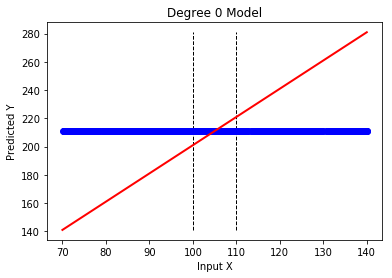

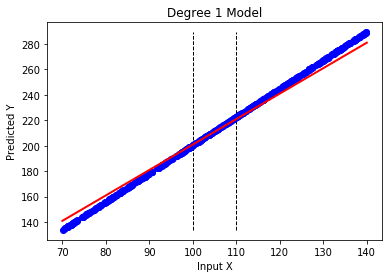

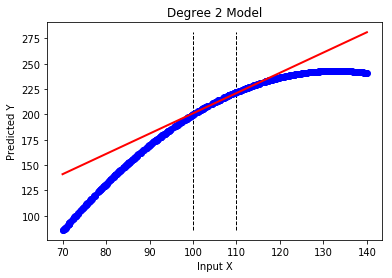

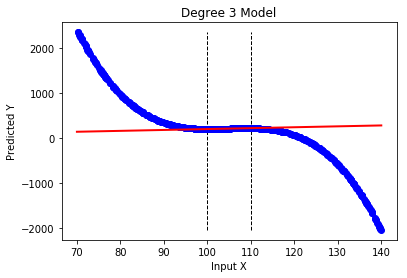

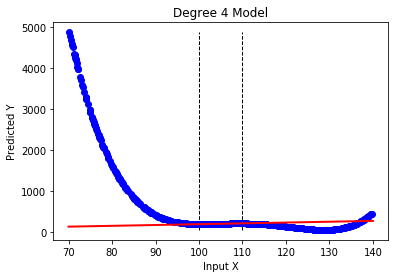

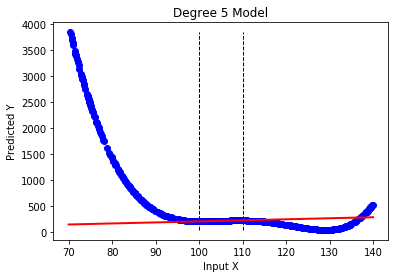

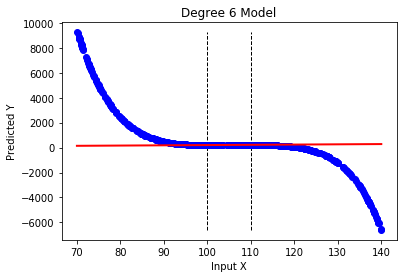

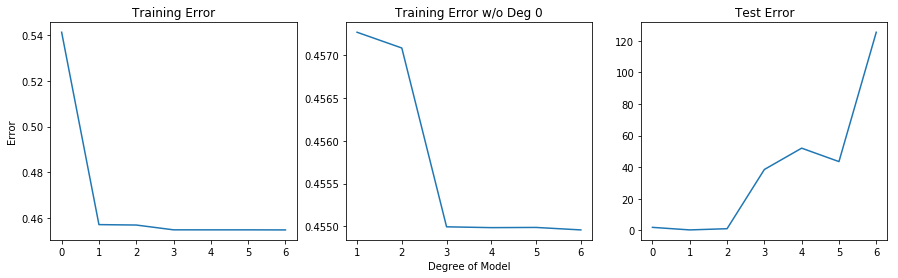

In [42]:
import numpy as np
import matplotlib.pyplot as plt

trainDataRange = [100,110]
trainDataRange = np.array(trainDataRange)
def generateTrainData(numSamples=500,showPlot=True):
    inputX = np.random.random_sample((numSamples,))*(trainDataRange[1]-trainDataRange[0])+trainDataRange[0]
    trueY = a*inputX+b
    noisyY = trueY+np.random.randn(numSamples)*10
    if showPlot:
        plt.plot(inputX,noisyY,'bo')
        plt.plot(trainDataRange, trainDataRange*a+b, 'r-', lw=2)
        plt.ylabel("Noisy Y")
        plt.xlabel("Input X")
        plt.title("Clean X and Noisy Y from Linear Relationship")
        plt.show()
        plt.clf()
    return inputX,noisyY

def validate(model,numSamples=500,dataRange=[70,140],showPlot=True):
    dataRange=np.array(dataRange)
    inputX = np.random.random_sample((numSamples,))*(dataRange[1]-dataRange[0])+dataRange[0]
    trueY = a*inputX+b
    predY=predict(model,inputX)
    if showPlot:
        coordX1 = [trainDataRange[0]]*2
        coordX2 = [trainDataRange[1]]*2
        minY = min(min(dataRange*a+b),min(predY))
        maxY = max(max(dataRange*a+b),max(predY))
        plt.plot(coordX1, [minY,maxY], 'k-', lw=1,linestyle="--")
        plt.plot(coordX2, [minY,maxY], 'k-', lw=1,linestyle="--")
        
        plt.plot(inputX,predY,'bo')
        plt.plot(dataRange, dataRange*a+b, 'r-', lw=2)



        plt.ylabel("Predicted Y")
        plt.xlabel("Input X")
        plt.title("Degree " + str (len(model)-1)+ " Model")
        plt.show()
    return error(trueY,predY)

def model(trainX,trainY,degree=1):
    powers=np.vander(trainX,degree+1)
    A=powers
    model = np.linalg.solve(A.T@A,A.T@trainY)
    return model

def predict(model,x):
    degree=len(model)-1
    powers=np.vander(x,degree+1)
    return powers@model

def error(trueY,predY):
    return np.linalg.norm((trueY-predY))/len(trueY)

def overfittingDemo(maxDegree=6):
    trainX,trainY = generateTrainData(showPlot=False)
    trainError = []
    testError = []
    for deg in range(maxDegree+1):
        currModel = model(trainX,trainY,degree=deg)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,showPlot=True)
        trainError.append(currTrainErr)
        testError.append(currTestErr)
        
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(range(maxDegree+1),trainError)
    plt.ylabel("Error")
    plt.title("Training Error")
    
    plt.subplot(1,3,2)
    plt.plot(range(1,maxDegree+1),trainError[1:])
    plt.xlabel("Degree of Model")
    plt.title("Training Error w/o Deg 0")
    
    plt.subplot(1,3,3)
    plt.plot(range(maxDegree+1),testError)
    plt.title("Test Error")
    plt.show()
#True model: y=ax+b
a = 2
b = 1

overfittingDemo()

#Uncomment to test around yourself!

# #Create and Visualize Training Data
# trainX,trainY = generateTrainData()

# #Degree 1 Model
# model1 = model(trainX,trainY,degree=1)

# #Model Parameters (how close is it to a and b?)
# print(model1)

# #Degree 2 Model
# model2 = model(trainX,trainY,degree=2)

# #Error Values and Visualizations
# err1 = validate(model1)
# err2 = validate(model2)
# print(err1,err2)


In [57]:
a=(1,2)
print(a*2)

(1, 2, 1, 2)


## Classification vs Regression
In general, there are two major types of machine learning problems, classification and regression.

*Classification* is a problem where we would like to *classify* some sample input into a class or category. For example, we could classify the genre of a movie or classify a handwritten digit as $0-9$. The input may be a list of features, or *qualities* of a sample (for digits this would the individual pixels of the image), and the output is a class or label. Note that the bins are discrete and often categorical, and there are a finite number of classes. 

For modeling classification problems, this may involve generating a probability for each class, and selecting the class with the highest probability. In this notebook, we will investigate a simpler model, using a method called *k-nearest neighbors*.

*Regression* does not depend on distinct classes for labels. The input is still a set of features, but the output is instead a continous value. This may be predicting the population in $5$ years (#populationmodeling) or the temperature tomorrow. In this situation, the "right answer" is more vague. If we predict the temperature to be $70$ degrees tomorrow but it is actually $71$, are we right? What if we predicted $70.5$ degrees? This adds a layer of complexity between regression and classification. 

For modeling regression problems this may be done by creating some function approximation in terms of the input. For example, linear regression is the simplest model, and outputs a continous value. There are more complex models such as *neural networks* that act as universal function approximators.

# k-Nearest Neighbors
The k-Nearest Neighbors (kNN) algorithm is one of the simplest models. The core idea is that a similar set of features should have the same label. For example if we receive an image $A$ as input where we would like to classify the digit, we could look at what other images look $A$ like in our training set. If we were doing $5$-nearest neighbors, we would find the $5$ images closest to $A$ in our data set, and return the most common digit among the $5$. In general, you may choose any value for $k$, $5$ may not be the best choice. Note, this has a $O(1)$ training time! This is the fastest algorithm for training, as there is no training!

However, some questions immediately arise. How do you determine how close two images are? Why choose $5$, not $10$ or $100$? There are other consequences as well, you need to look through your entire dataset each time to determine the $k$ closest images, which could take a long time if your training set is huge. The prediction time for kNN is $O(n)$, which is much slower than something like linear regression, where the prediction is $O(1)$.

We will address these questions and the shortcomings of kNN.

A few conceptual questions for understanding:
1. In binary classification (two classes), why is choosing an odd value for $k$ better than an even value?
2. Given two separate ordered pairs of two values, $(a,b)$ and $(x,y)$, what possibilities are there for calculating the "distance" between them? What are the differences between approaches?
3. Assume we are doing image classification. List any possible issues with image classification.
4. What does 1-NN mean? If we have $n$ training data, what is $n$-NN? What are some of the *tradeoffs* for varying $k$ between $1$ and $n$?

In [6]:

# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd

In [58]:
movies = pd.read_csv('movies.csv')
movies.head()


<class 'pandas.core.frame.DataFrame'>
[ 0.00026371  0.03691983]


In [23]:
print(type(movies))
the_matrix=movies[movies["Title"]=="the matrix"]

dir(the_matrix['hey'])
print(the_matrix[['hey','i']].as_matrix()[0])


,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [62]:
stemmings = pd.read_csv('stem.csv')
stemmings.head()


,Stem,Word
0,sowel,sowell
1,everybodyit,everybodyit
2,uabortu,uabortu
3,wood,woods
4,spider,spiders


In [66]:
movies[:]

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
